# ANALYSIS - 5

# HOST ANALYSIS & RECOMMENDATION SYSTEM FOR PRICES


Lets analyze the trend of people hosting AirBnBs in Boston.We can get insights about how much more popular is AirBnB among hosts now than it was two or three years ago.

In [57]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('../data/listings.csv')
inputDF=inputDF[['id','instant_bookable','room_type','host_since','accommodates','bathrooms','bedrooms','beds','amenities','cancellation_policy','review_scores_rating','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.accommodates  > 0]

for i,r in inputDF.iterrows():
    inputDF.set_value(i,'year',r['host_since'][:4])
    inputDF.set_value(i,'month',r['host_since'][5:7])
    inputDF.set_value(i,'day',r['host_since'][8:])
inputDF.head()

,id,instant_bookable,room_type,host_since,accommodates,bathrooms,bedrooms,beds,amenities,cancellation_policy,review_scores_rating,price,year,month,day
1,3075044,t,Private room,2012-06-07,2,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",moderate,94.0,65.0,2012,06,07
2,6976,f,Private room,2009-05-11,2,1.0,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",moderate,98.0,65.0,2009,05,11
3,1436513,f,Private room,2013-04-21,4,1.0,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",moderate,100.0,75.0,2013,04,21
4,7651065,f,Private room,2014-05-11,2,1.5,1.0,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",flexible,99.0,79.0,2014,05,11
5,12386020,f,Private room,2016-03-23,2,1.0,1.0,1.0,"{""Cable TV"",""Wireless Internet"",""Air Condition...",flexible,100.0,75.0,2016,03,23


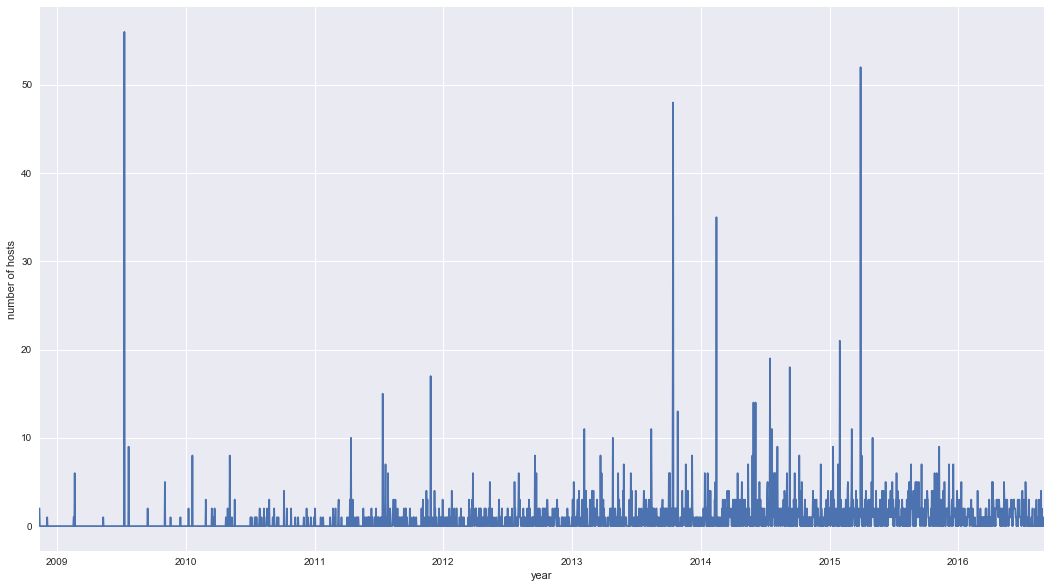

In [30]:
# this graph shows count of host registered everyday by resampling the data for each day

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
join_dates = pd.to_datetime(inputDF['host_since']).value_counts().resample('D').mean().fillna(0)
join_dates.plot()
plt.xlabel('year')
plt.ylabel('number of hosts')

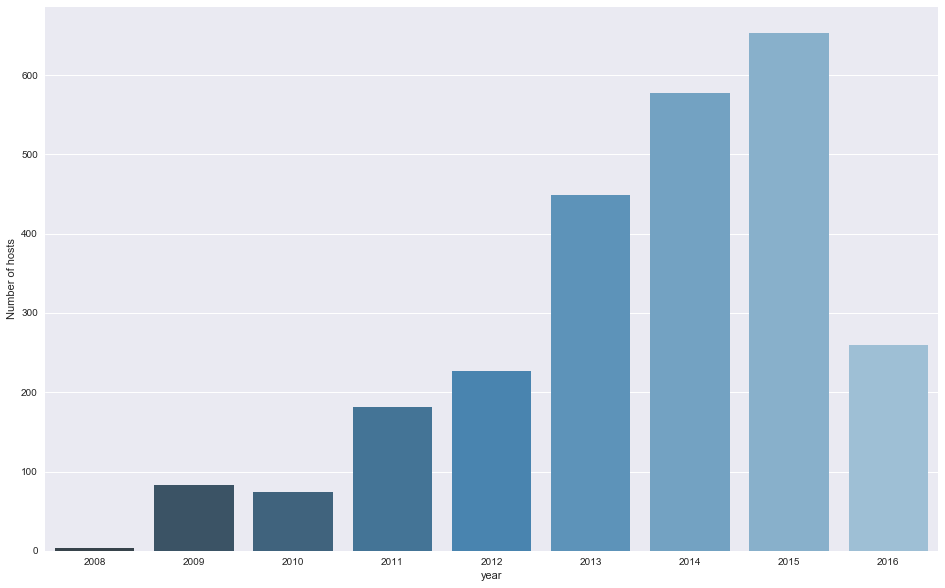

In [64]:
plt.figure(figsize=(16,10))
yearDF=inputDF.groupby(['year']).id.count()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'id':'Number of hosts'})
ax = sns.barplot(x='year', y="Number of hosts", data=yearDF,palette="Blues_d")
plt.ylabel('Number of hosts')

It can be analyzed that Most of the hosts registered in the year 2015.Lets analyze the months

In [ ]:
#plotting for all months for each year

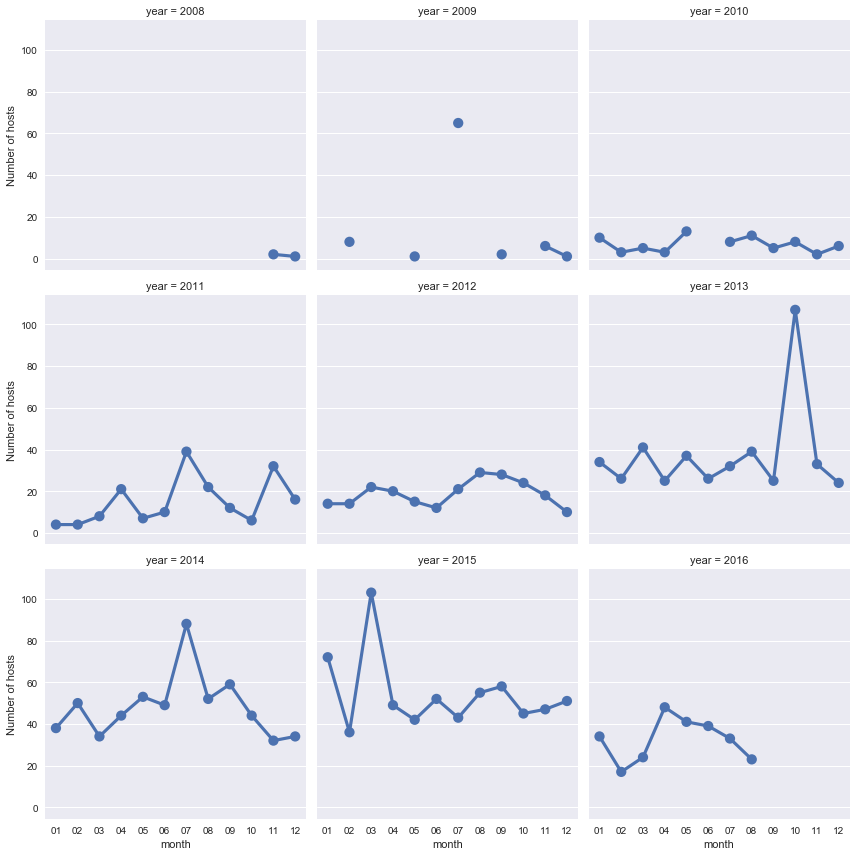

In [66]:
import seaborn as sns

yearMonth=inputDF.groupby(['year','month']).id.count()
yearMonth=yearMonth.reset_index()
yearMonth=yearMonth.sort_values(['year','month'],ascending=[1,1])
yearMonth=yearMonth.rename(columns={"id":"Number of hosts"})
sns.factorplot(data=yearMonth, x="month", y="Number of hosts",col="year",col_wrap=3) 


it can be seen that most of the hosts registered in the month of july,november and march.Although there is no specific trend followed.Lets check do people register more on weekends?

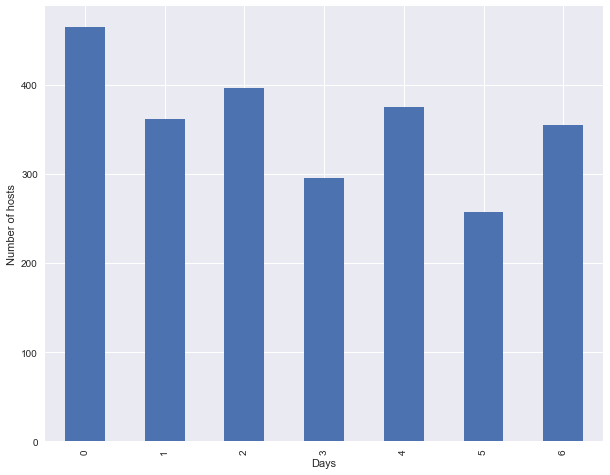

In [69]:
plt.figure(figsize=(10,8))
pd.to_datetime(inputDF['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of hosts")

After analyzing and looking at all the factors which contributes towards deciding the price of a listing I ma trying to develop a recommendation system for determining the price of test data while training the system on the training data 

I am only considering the columns on which Prices are found to be dependent as the original dataset consists of so many unwanted columns.I have cleaned the dataset by removing arows 0 as their number of bedrooms, batrooms ,beds and converted the price column data into a float to perform operations on the same.

Data is presented in categorial form.Hence I am using pandas' get_dummies function to convert Categorial variables into indicator variables.

In [4]:
#this will create 4 columns namely flexible, moderate, strict, super_strict_30 which are its categories

cancel_policy = pd.get_dummies(inputDF.cancellation_policy).astype(int)
cancel_policy.head()

,flexible,moderate,strict,super_strict_30
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
5,1,0,0,0


In [5]:
# Similiarly converting remaining categorial column,instant_booking  into indiactor variables

instant_booking = pd.get_dummies(inputDF.instant_bookable, prefix = 'instant_booking').astype(int)
instant_booking.head()

,instant_booking_f,instant_booking_t
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0


In [6]:
room_type = pd.get_dummies(inputDF.room_type).astype(int)
room_type.head()

,Entire home/apt,Private room,Shared room
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


Now when I have all the categorial data turned into indicator variables,original columns can be dropped and can be replaced by new columns containing indicator variables for the same.

In [7]:
# drop original columns and replace them with indicator columns

inputDF = inputDF.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
inputDF = pd.concat((inputDF, cancel_policy, instant_booking, room_type), axis = 1)

inputDF.head()

,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,flexible,moderate,strict,super_strict_30,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
1,2,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",94.0,65.0,0,1,0,0,0,1,0,1,0
2,2,1.0,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",98.0,65.0,0,1,0,0,1,0,0,1,0
3,4,1.0,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",100.0,75.0,0,1,0,0,1,0,0,1,0
4,2,1.5,1.0,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",99.0,79.0,1,0,0,0,1,0,0,1,0
5,2,1.0,1.0,1.0,"{""Cable TV"",""Wireless Internet"",""Air Condition...",100.0,75.0,1,0,0,0,1,0,0,1,0


In [12]:
# splitting the amenities list to count the number of amenities
amenities_list = []

for element in inputDF.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

inputDF.amenities = amenities_list
inputDF.head()

,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,flexible,moderate,strict,super_strict_30,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
1,2,1.0,1.0,1.0,17,94.0,65.0,0,1,0,0,0,1,0,1,0
2,2,1.0,1.0,1.0,20,98.0,65.0,0,1,0,0,1,0,0,1,0
3,4,1.0,1.0,2.0,17,100.0,75.0,0,1,0,0,1,0,0,1,0
4,2,1.5,1.0,2.0,9,99.0,79.0,1,0,0,0,1,0,0,1,0
5,2,1.0,1.0,1.0,15,100.0,75.0,1,0,0,0,1,0,0,1,0


Now after converting all our data into indicator variables we can separateour data into test and train sets using scikit learn's  train_test_split function

In [20]:
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import metrics
from sklearn import datasets
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import ensemble

split_data= inputDF.drop(['price'],axis=1)
train1,test1,train2,test2=cross_validation.train_test_split(split_data,inputDF.price, test_size=0.4,train_size = 0.6,random_state=13)

In [22]:
# Lets analyze if linear regression can predict the prices accurately
# mean of prices
mean = np.mean(inputDF.price)

# standard deviation to compare 
std = np.std(inputDF.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))

mean: 168.4856344772546
standard deviation: 117.47652969451681


In [27]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train1, train2)
linear_reg_error = metrics.median_absolute_error(test2, linear_reg.predict(test1))
print ("Linear Regression: " + str(linear_reg_error))

Linear Regression: 34.7018093101


This is a small recommendation system which I built using linear Regression.It is not accurate and gives an error of $34.70 in price.The future scope of this project could be using different algorithm to predict accurate pricesof test data.